In [ ]:
%pip install sklearn-som

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn_som.som import SOM
from sklearn.metrics.cluster import silhouette_score

In [ ]:
dataset_iris = load_iris()
x = dataset_iris.data
y = dataset_iris.target

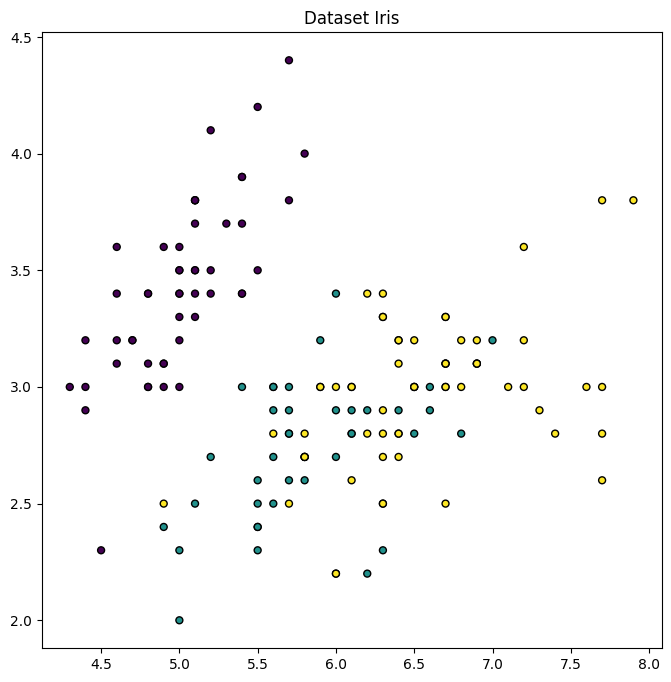

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Dataset Iris")
plt.scatter(x[:, 0], x[:, 1], c = y, marker="o", s=25, edgecolor="k")
plt.show()

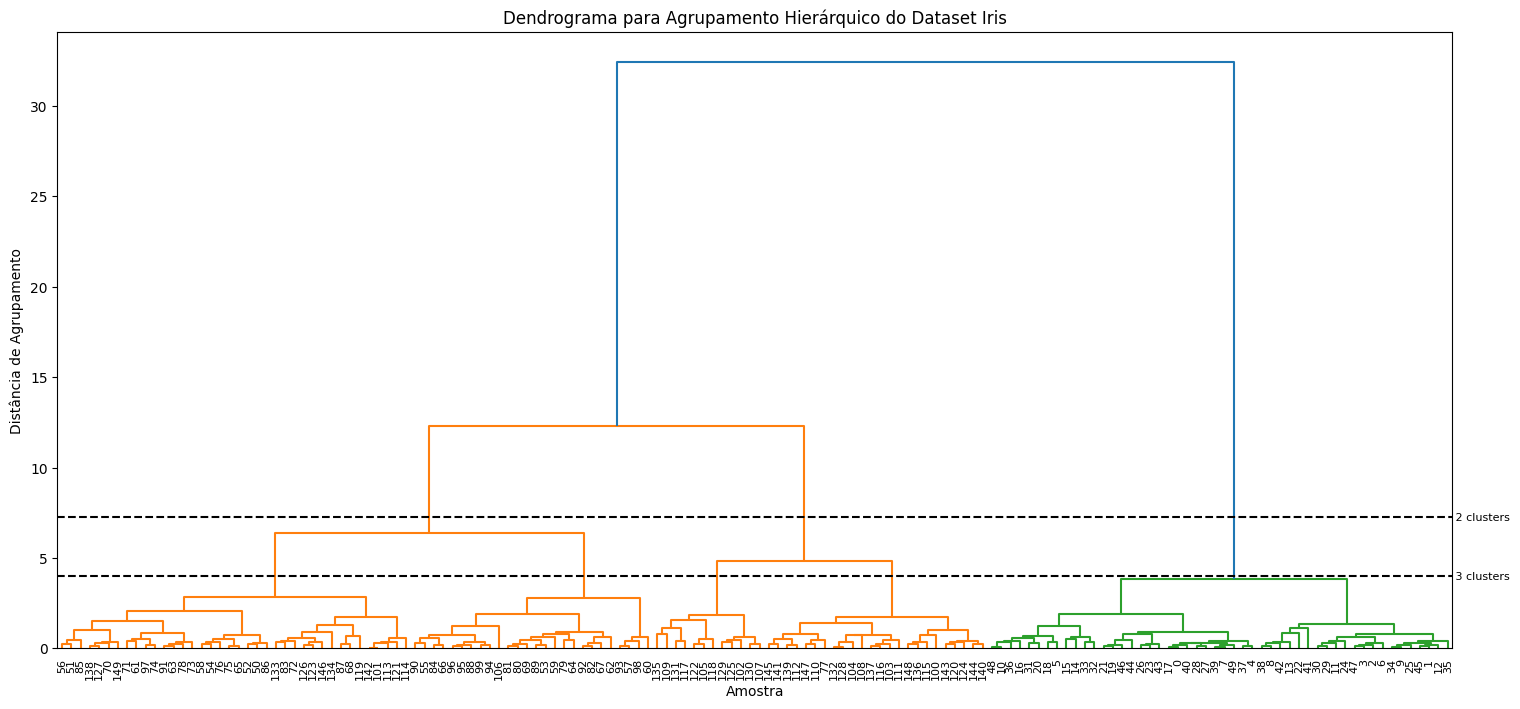

In [ ]:
# Hierárquico

linkage_array = ward(x)

plt.figure(figsize=(18, 8))
plt.title("Dendrograma para Agrupamento Hierárquico do Dataset Iris")
dendrogram(linkage_array, orientation='top', distance_sort='descending', leaf_font_size=8)
plt.xlabel("Amostra")
plt.ylabel("Distância de Agrupamento")

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' 2 clusters', va='center', fontdict={'size': 8})
ax.text(bounds[1], 4, ' 3 clusters', va='center', fontdict={'size': 8})

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


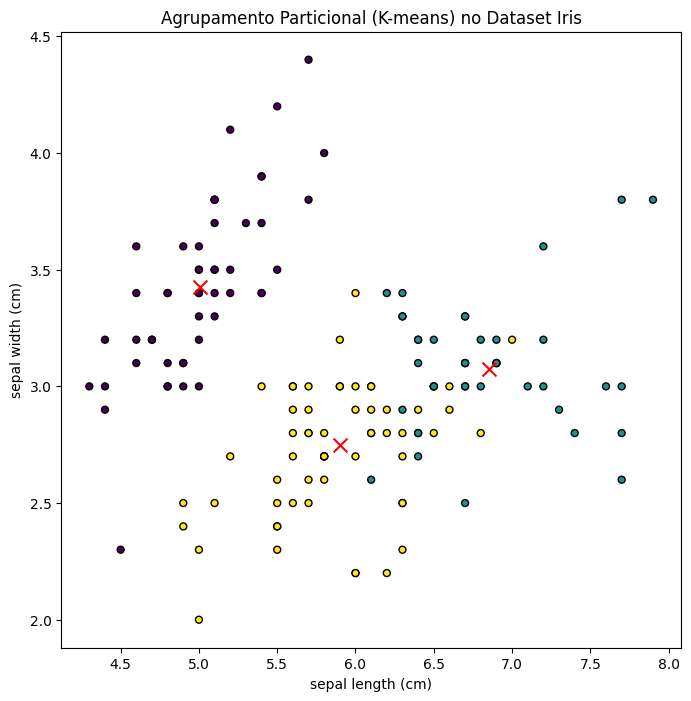

In [ ]:
# Particionais baseados em erro médio quadrático (K-means)

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)


plt.figure(figsize=(8, 8))
plt.title("Agrupamento Particional (K-means) no Dataset Iris")
plt.scatter(x[:, 0], x[:, 1],  marker="o", c=kmeans.labels_, cmap='viridis', s=25, edgecolor="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", c='red', s=100)
plt.xlabel(dataset_iris.feature_names[0])
plt.ylabel(dataset_iris.feature_names[1])
plt.show()

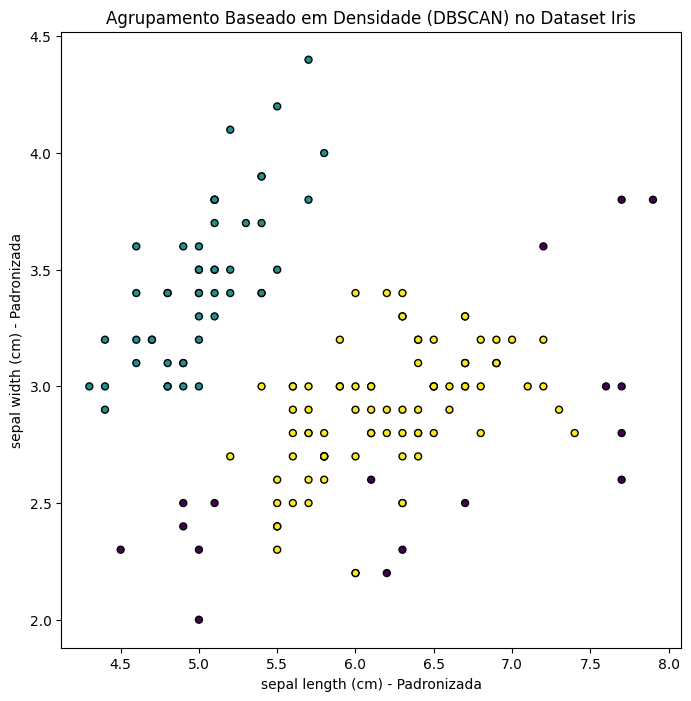

Número estimado de clusters: 2
Número estimado de pontos de ruído: 17


In [ ]:
# Baseados em Densidade (DBSCAN)

epsilon = 0.5
min_samples = 5

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples).fit(x)

labels = dbscan.labels_

caracteristica = [f"{caracteristica} - Padronizada" for caracteristica in dataset_iris.feature_names]

plt.figure(figsize=(8, 8))
plt.title("Agrupamento Baseado em Densidade (DBSCAN) no Dataset Iris")
plt.scatter(x[:, 0], x[:, 1], c = labels, cmap= 'viridis', marker="o", s=25, edgecolor="k")
plt.xlabel(caracteristica[0])
plt.ylabel(caracteristica[1])
plt.show()

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de pontos de ruído: %d" % n_noise_)

<ipython-input-80-aaa40ded9338>:10: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x[:, 0], x[:, 1], marker = "x", c = labels, s = 25, edgecolor = "k")


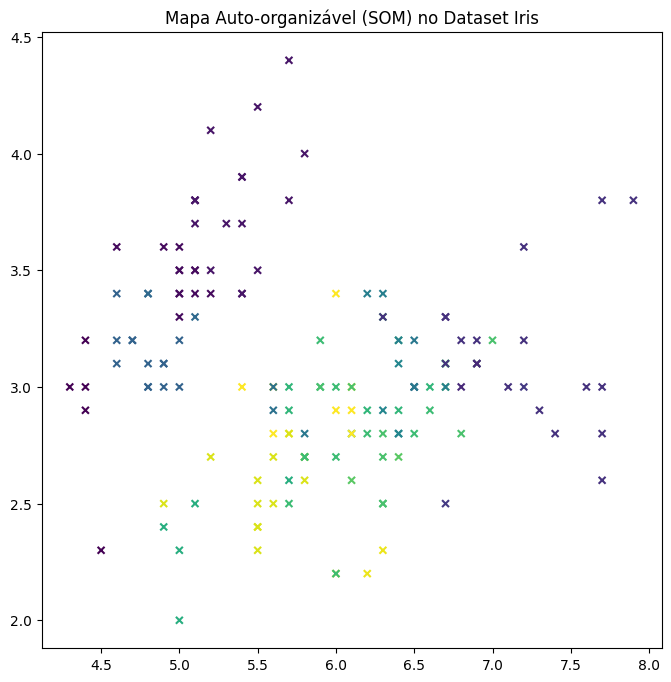

In [ ]:
# Baseado em Redes Neurais (SOM)

som = SOM(m=10, n=10, dim=4)
som.fit(x)

labels = som.predict(x)

plt.figure(figsize=(8, 8))
plt.title("Mapa Auto-organizável (SOM) no Dataset Iris")
plt.scatter(x[:, 0], x[:, 1], marker = "x", c = labels, s = 25, edgecolor = "k")
plt.show()